<a href="https://colab.research.google.com/github/tramhuyen/Personal-Projects/blob/main/ARIMA_Model_Electricity_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ARIMA TO PREDICT ELECTRICITY CONSUMPTION
This dataset get from [Kaggle](https://www.kaggle.com/datasets/thedevastator/240000-household-electricity-consumption-records)

**About this dataset**

This dataset contains six months of electricity consumption data for a household, gathered between January 2007 and June 2007.
The data includes information on global active power, global reactive power, voltage, global intensity, sub-metering 1 (kitchen), sub-metering 2 (laundry room), and sub-metering 3 (electric water heater and air conditioner). With 260,640 measurements in total, this dataset can provide crucial insights into understanding household electricity consumption.

The purpose of this notebook is to demonstrate the use of **ARIMA** in time series forecasting.

##Table of contents
1. [Data pre-processing](#section1)
2. [Exploratory Data Analysis (EDA)](#section2)
3. [Data preparation](#section3)
4. [Data modeling](#section4)


# <a name="section1"></a> Preprocessing

In [ ]:
#Import libraries
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pmdarima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.2 MB/s eta 0:00:00


In [ ]:
link = 'https://drive.google.com/file/d/1YJfgLvtQ9JeX6aortUtl3Fy-0PKdEUPw/view?usp=sharingrive_link'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df = pd.read_csv(path)


In [ ]:
df

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,2,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,3,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,4,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
260635,260635,30/6/2007,23:55:00,2.88,0.36,239.01,12,0,0,18.0
260636,260636,30/6/2007,23:56:00,2.892,0.358,238.86,12.2,0,0,17.0
260637,260637,30/6/2007,23:57:00,2.882,0.28,239.05,12,0,0,18.0
260638,260638,30/6/2007,23:58:00,2.66,0.29,238.98,11.2,0,0,18.0


In [ ]:
df.head()

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,2,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,3,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,4,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0


In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260640 entries, 0 to 260639
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  260640 non-null  int64  
 1   Date                   260640 non-null  object 
 2   Time                   260640 non-null  object 
 3   Global_active_power    260640 non-null  object 
 4   Global_reactive_power  260640 non-null  object 
 5   Voltage                260640 non-null  object 
 6   Global_intensity       260640 non-null  object 
 7   Sub_metering_1         260640 non-null  object 
 8   Sub_metering_2         260640 non-null  object 
 9   Sub_metering_3         256869 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 19.9+ MB


None

In [ ]:
df.isnull().sum()

index                       0
Date                        0
Time                        0
Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2              0
Sub_metering_3           3771
dtype: int64

In [ ]:
#Skiming for unique values
for col in df.columns:
  print("name {} : values {}".format(col,df[col].unique()))

name index : values [     0      1      2 ... 260637 260638 260639]
name Date : values ['1/1/07' '2/1/07' '3/1/07' '4/1/07' '5/1/07' '6/1/07' '7/1/07' '8/1/07'
 '9/1/07' '10/1/07' '11/1/07' '12/1/07' '13/1/2007' '14/1/2007'
 '15/1/2007' '16/1/2007' '17/1/2007' '18/1/2007' '19/1/2007' '20/1/2007'
 '21/1/2007' '22/1/2007' '23/1/2007' '24/1/2007' '25/1/2007' '26/1/2007'
 '27/1/2007' '28/1/2007' '29/1/2007' '30/1/2007' '31/1/2007' '1/2/07'
 '2/2/07' '3/2/07' '4/2/07' '5/2/07' '6/2/07' '7/2/07' '8/2/07' '9/2/07'
 '10/2/07' '11/2/07' '12/2/07' '13/2/2007' '14/2/2007' '15/2/2007'
 '16/2/2007' '17/2/2007' '18/2/2007' '19/2/2007' '20/2/2007' '21/2/2007'
 '22/2/2007' '23/2/2007' '24/2/2007' '25/2/2007' '26/2/2007' '27/2/2007'
 '28/2/2007' '1/3/07' '2/3/07' '3/3/07' '4/3/07' '5/3/07' '6/3/07'
 '7/3/07' '8/3/07' '9/3/07' '10/3/07' '11/3/07' '12/3/07' '13/3/2007'
 '14/3/2007' '15/3/2007' '16/3/2007' '17/3/2007' '18/3/2007' '19/3/2007'
 '20/3/2007' '21/3/2007' '22/3/2007' '23/3/2007' '24/3/2007' '25

There are "?" values in data. We need to replace them with NaN.

In [ ]:
#Change datatype
df['Date']=pd.to_datetime(df['Date'], dayfirst = True, yearfirst = False )
df['Time']=pd.to_timedelta(df['Time'])
print(df.tail())
df['Datetime'] = df['Date'] + df['Time']
df['Datetime']
df.set_index('Datetime', inplace=True)


         index       Date            Time Global_active_power  \
260635  260635 2007-06-30 0 days 23:55:00                2.88   
260636  260636 2007-06-30 0 days 23:56:00               2.892   
260637  260637 2007-06-30 0 days 23:57:00               2.882   
260638  260638 2007-06-30 0 days 23:58:00                2.66   
260639  260639 2007-06-30 0 days 23:59:00               2.548   

       Global_reactive_power Voltage Global_intensity Sub_metering_1  \
260635                  0.36  239.01               12              0   
260636                 0.358  238.86             12.2              0   
260637                  0.28  239.05               12              0   
260638                  0.29  238.98             11.2              0   
260639                 0.354  239.25             10.6              0   

       Sub_metering_2  Sub_metering_3  
260635              0            18.0  
260636              0            17.0  
260637              0            18.0  
260638          

In [ ]:
counts_per_date = df.groupby(df['Date'])['Time'].count()
filtered_df = df.loc[df['Date'].isin(counts_per_date[counts_per_date < 1440].index)]
print(filtered_df)#df.loc[df['Date'].isin(counts_per_date[counts_per_date < 1440].index)]

Empty DataFrame
Columns: [index, Date, Time, Global_active_power, Global_reactive_power, Voltage, Global_intensity, Sub_metering_1, Sub_metering_2, Sub_metering_3]
Index: []


In [ ]:
df=df.sort_values('Datetime')


In [ ]:
df

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,,,,
2007-01-01 00:00:00,0,2007-01-01,0 days 00:00:00,2.58,0.136,241.97,10.6,0,0,0.0
2007-01-01 00:01:00,1,2007-01-01,0 days 00:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2007-01-01 00:02:00,2,2007-01-01,0 days 00:02:00,2.55,0.1,241.64,10.4,0,0,0.0
2007-01-01 00:03:00,3,2007-01-01,0 days 00:03:00,2.55,0.1,241.71,10.4,0,0,0.0
2007-01-01 00:04:00,4,2007-01-01,0 days 00:04:00,2.554,0.1,241.98,10.4,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
2007-06-30 23:55:00,260635,2007-06-30,0 days 23:55:00,2.88,0.36,239.01,12,0,0,18.0
2007-06-30 23:56:00,260636,2007-06-30,0 days 23:56:00,2.892,0.358,238.86,12.2,0,0,17.0
2007-06-30 23:57:00,260637,2007-06-30,0 days 23:57:00,2.882,0.28,239.05,12,0,0,18.0


In [ ]:
df =df.drop(columns=['index'])

In [ ]:
#Replace abnomal values with NaN
oj_col = [col for col in df.columns if df[col].dtype == "O"]
oj_col
pattern = '^[^\d]*$'
for col in oj_col:
    df[col] = df[col].apply(lambda x: np.nan if re.match(pattern, str(x)) else x)

In [ ]:
#Convert the values of the object to numeric
for col in [col for col in df.columns if df[col].dtype == "O"]:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype(float)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260640 entries, 2007-01-01 00:00:00 to 2007-06-30 23:59:00
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   Date                   260640 non-null  datetime64[ns] 
 1   Time                   260640 non-null  timedelta64[ns]
 2   Global_active_power    256869 non-null  float64        
 3   Global_reactive_power  256869 non-null  float64        
 4   Voltage                256869 non-null  float64        
 5   Global_intensity       256869 non-null  float64        
 6   Sub_metering_1         256869 non-null  float64        
 7   Sub_metering_2         256869 non-null  float64        
 8   Sub_metering_3         256869 non-null  float64        
dtypes: datetime64[ns](1), float64(7), timedelta64[ns](1)
memory usage: 19.9 MB


In [ ]:
df.isnull().sum()

Date                        0
Time                        0
Global_active_power      3771
Global_reactive_power    3771
Voltage                  3771
Global_intensity         3771
Sub_metering_1           3771
Sub_metering_2           3771
Sub_metering_3           3771
dtype: int64

In [ ]:
#Fill NaN values with median
df.fillna(df.median(), inplace=True)

<ipython-input-17-ddc85fc4caf2>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.median(), inplace=True)
<ipython-input-17-ddc85fc4caf2>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.fillna(df.median(), inplace=True)


In [ ]:
#Check for NaN values
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

# <a name="section2"></a> EDA



Total power consumption is calculated by Global active power, sub metering 1, sub metering 2 and sub metering 3. I named the power consumption as **'total'**.

In [ ]:
#Create column named 'total'
df['total'] = df['Global_active_power']*1000/60 - df['Sub_metering_1'] - df['Sub_metering_2'] - df['Sub_metering_3']

In [ ]:
column = df[['Global_active_power','Global_reactive_power',	'Voltage',	'Global_intensity']]
df = df.drop(columns = column)

In [ ]:
df =df.drop(columns = ['Time', 'Date', 'Sub_metering_1','Sub_metering_2', 'Sub_metering_3'])


<Axes: title={'center': 'Hourly - Total watt-hour for Power Consumption'}, xlabel='Hour', ylabel='Readings in watt-hour'>

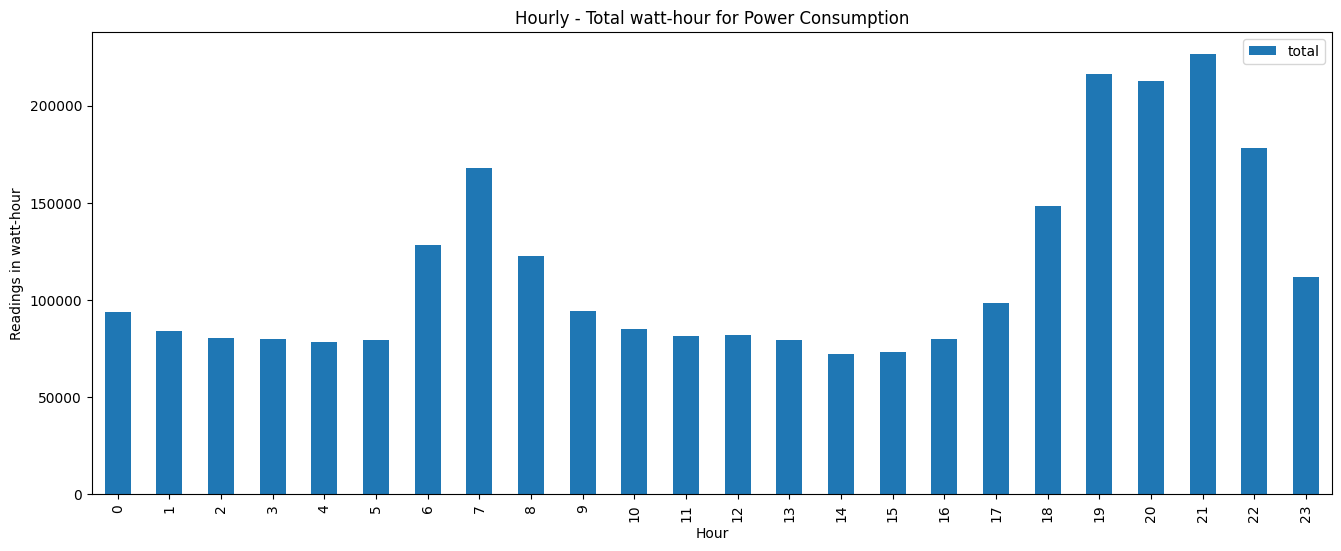

In [ ]:
# Hourly - Total watt-hour for Power Consumption
df.groupby(df.index.hour).sum().plot(kind="bar",xlabel='Hour',ylabel='Readings in watt-hour',title="Hourly - Total watt-hour for Power Consumption", figsize=(16,6))

<Axes: title={'center': 'Monthly - Total watt-hour for Power Consumption'}, xlabel='Month', ylabel='Readings in watt-hour'>

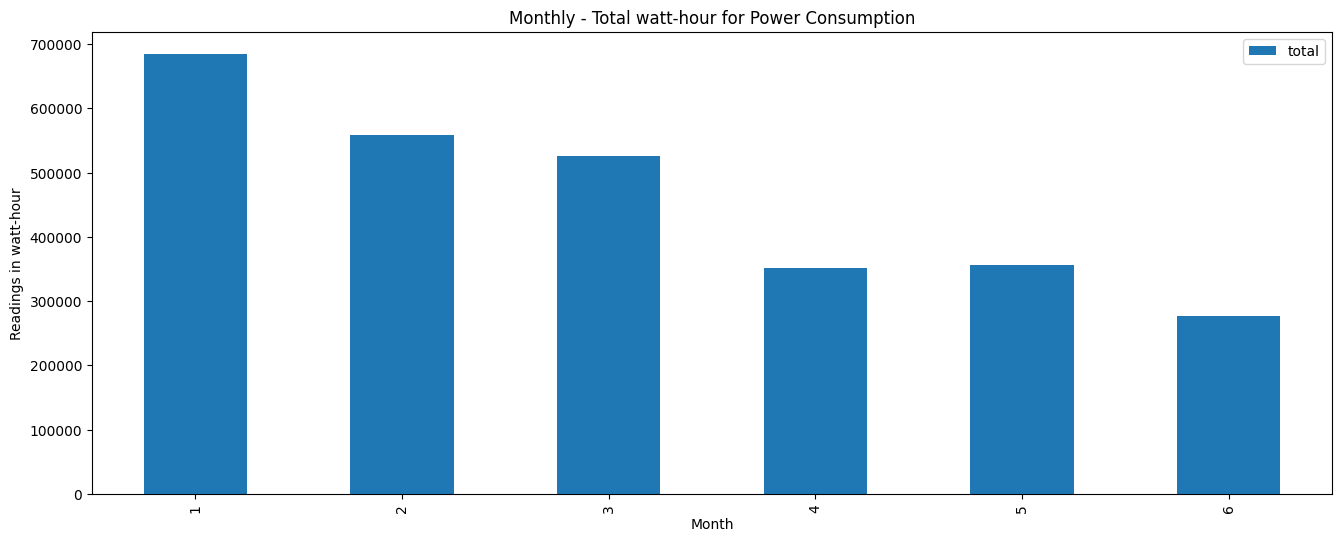

In [ ]:
# Monthly - Total watt-hour for Power Consumption
df.groupby(df.index.month).sum().plot(kind="bar",xlabel='Month',ylabel='Readings in watt-hour',title="Monthly - Total watt-hour for Power Consumption", figsize=(16,6))

# <a name="section3"></a> Data preparation

In [ ]:
df1 = df.rolling(window = 1440).sum().dropna()

In [ ]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df1, autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4], index =['Test Statistic', 'p-value','Lags Used', 'Number of observation Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s) '%key] = value
print(dfoutput)

Test Statistic               -6.854019e+00
p-value                       1.666172e-09
Lags Used                     8.600000e+01
Number of observation Used    2.591140e+05
Critical Value (1%)          -3.430375e+00
Critical Value (5%)          -2.861551e+00
Critical Value (10%)         -2.566776e+00
dtype: float64


Since p-value < 0.005, that means the data is stationary.


Text(0.5, 1.0, 'Hourly')

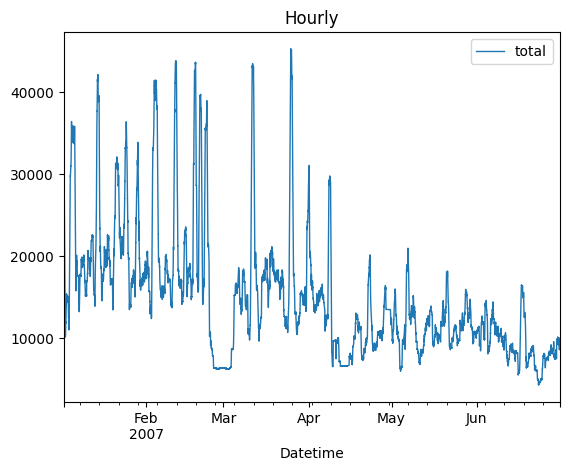

In [ ]:
df1.plot(linewidth=1)
plt.title('Hourly')

<Figure size 1000x500 with 0 Axes>

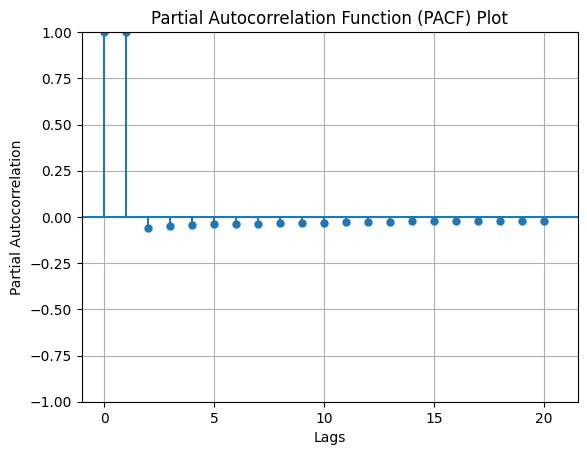

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

# Create the PACF plot
plt.figure(figsize=(10, 5))
plot_pacf(df1, lags=20)  # Adjust the number of lags as needed
plt.title('Partial Autocorrelation Function (PACF) Plot')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

In [ ]:
train_data, test_data = df1[:int(len(df1)*0.8)], df1[int(len(df1)*0.8):]
print(len(train_data), len(test_data))

207360 51841


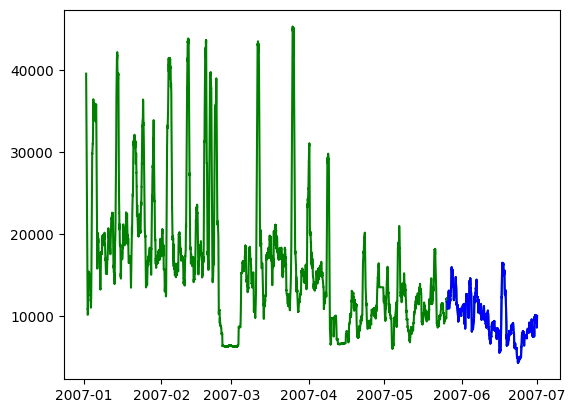

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1,"green", label = "train data")
plt.plot(test_data, "blue", label = "test data")

# <a name="section4"></a> Data modeling

In [ ]:
from pmdarima.arima import auto_arima
model = auto_arima(train_data,
                   start_p = 0,
                   start_q = 0,
                   max_p = 3,
                   max_q = 3,
                   max_order = 3,
                   seasonal = True,
                   stepwise = True,trace = True )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1681399.821, Time=4.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1291932.284, Time=10.00 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1487129.545, Time=50.69 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1681417.065, Time=2.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1290105.348, Time=13.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1282929.275, Time=16.61 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1269766.344, Time=133.84 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1287950.673, Time=77.39 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1269384.272, Time=267.62 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1271591.323, Time=149.55 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1269364.512, Time=214.49 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1270577.058, Time=185.22 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=1269362.753, Time=84.51 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=12

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


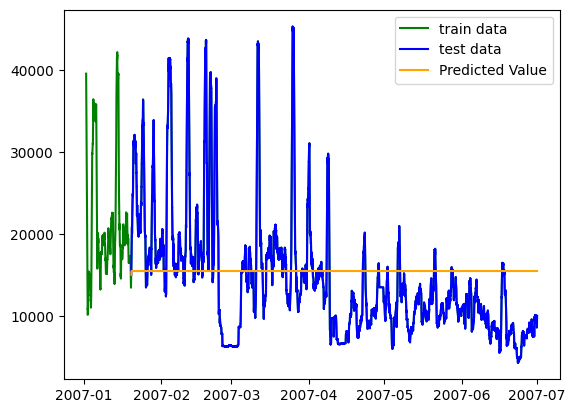

59251529.11082172 7697.501484950926 5741.657997433873


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


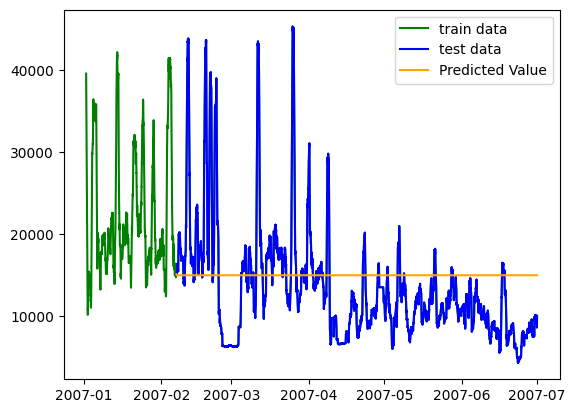

51091932.588094085 7147.862099124051 5291.963805713314


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


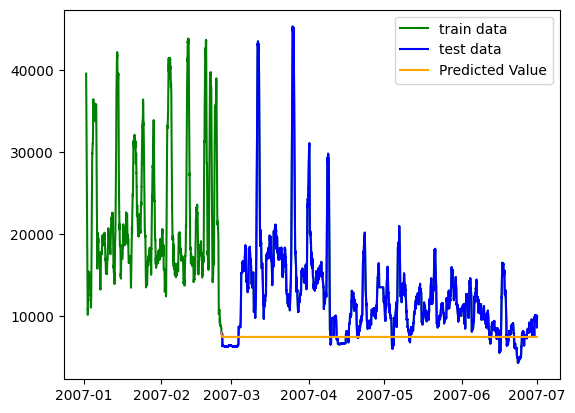

52939237.01887286 7275.93547379805 4995.579965044525


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


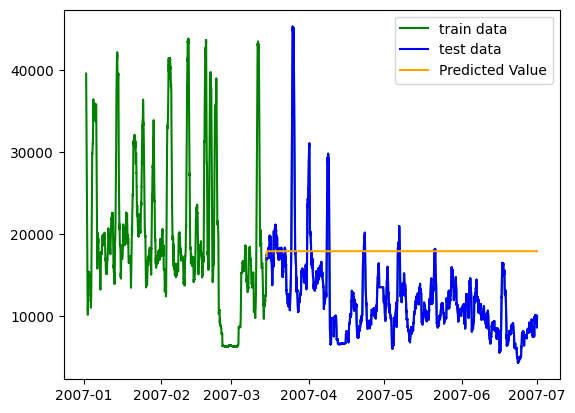

59748979.685932435 7729.746417957865 6841.972999163488


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


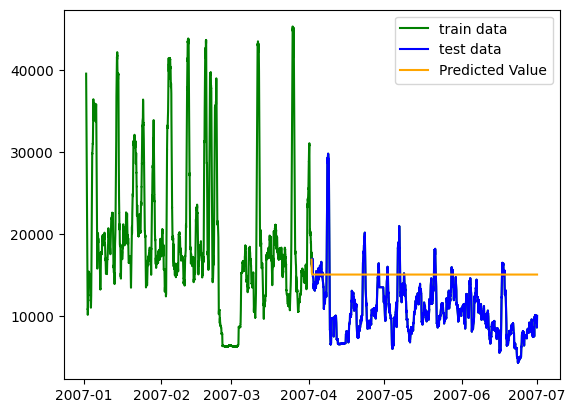

30047126.243775107 5481.525904688868 4813.108194375126


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


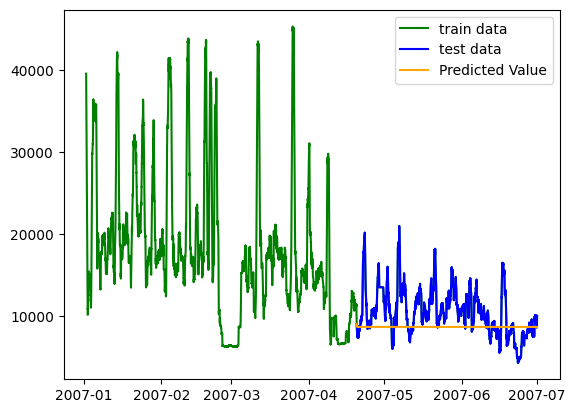

11493574.948251769 3390.2175370102386 2553.1375274439492


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


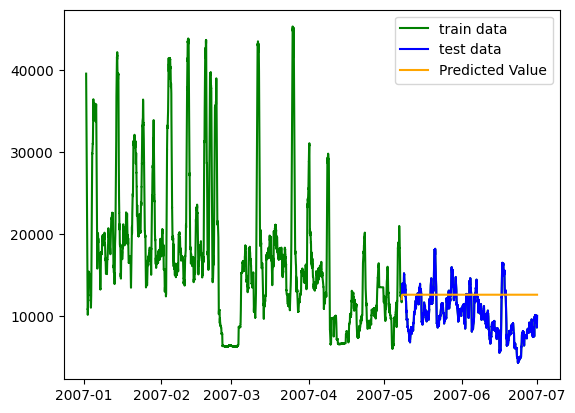

12614204.289119015 3551.648108852989 2983.744806904083


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


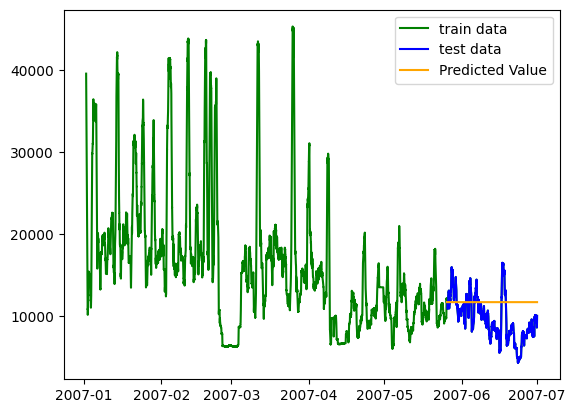

10862728.691255499 3295.865393376298 2774.277966263942


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


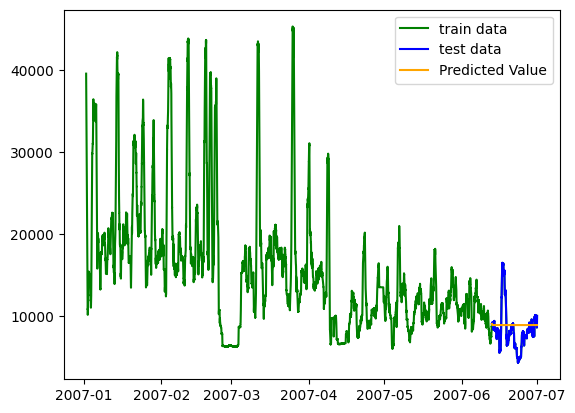

6626425.2636567885 2574.184388045423 1869.1186340703505


In [ ]:
i = 0.1
while i < 0.99:
  train_data, test_data = df1[:int(len(df1)*i)], df1[int(len(df1)*i):]
  model = ARIMA(train_data, order = (3,1,3))
  fitted = model.fit()
  pred_start = len(train_data)
  pred_end = len(train_data) + len(test_data) - 1
  pred = fitted.predict(start=pred_start, end=pred_end, typ='levels')
  pred_series = pd.Series(pred, index = test_data.index)
  plt.plot(df1, "green", label = "train data")
  plt.plot(test_data, "blue", label = "test data")
  plt.plot(pred, "orange", label = "Predicted Value")
  plt.legend(loc ='best')
  plt.show()
  mse = mean_squared_error(test_data, pred)
  rmse = mean_squared_error(test_data, pred, squared = False)
  mae = mean_absolute_error(test_data, pred)
  print(mse, rmse, mae)
  i += 0.1

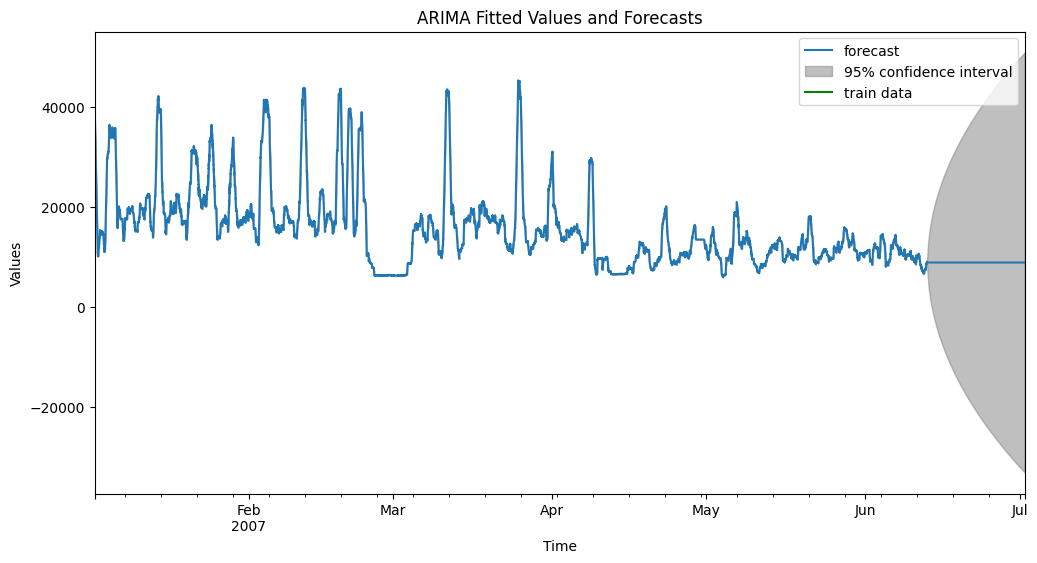

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
result= model.fit()

fig, ax = plt.subplots(figsize=(12, 6))


# Use the plot_predict method to plot fitted values and forecast
plot_predict(result,1, len(df1)+1440, ax=ax)
plt.plot(df1, "green", label = "train data")

# Customize the plot (title, labels, legend, etc.)
ax.set_xlabel("Time")
ax.set_ylabel("Values")
ax.set_title("ARIMA Fitted Values and Forecasts")
plt.legend(loc ='best')
plt.show()